<a href="https://colab.research.google.com/github/Ajinkya-dak/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
#path to given CSV file 
path = "/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"

In [101]:
Net_df = pd.read_csv(path)

In [102]:
#Column names in Dataframe 
Net_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [103]:
#top 5 
Net_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [104]:
#tail of data
Net_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [105]:
Net_df.shape

(7787, 12)

Shape of our dataset is (7787,11) that means we have 7787 number of rows and 11 columns

In [106]:
#Renaming Listed_in column to genre for ease of understanding 
Net_df.rename(columns = {"listed_in":"genres"},inplace = True)
Net_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [107]:
#basic info
Net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [108]:
Net_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [109]:
#checking unique values of each features
Net_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
genres           492
description     7769
dtype: int64

In [110]:
Net_df.duplicated().sum()

0

In [111]:
# Droping (show_id) column as it has no use in our Analysis
Net_df = Net_df.drop(['show_id'], axis =1)

In [112]:
Net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   genres        7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 669.3+ KB


# **Handling Null Values**

In [113]:
Net_df.isnull().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

There are quite alot of null values in the dataset. There are a total of 3,631 null values across the entire dataset,which is half the number of total dataset column. we cant just drop the columns containing null values.


In [114]:
# Null value hadling
Net_df['director'].fillna('Unknown', inplace=True)
Net_df['cast'].fillna('Unknown', inplace=True)
Net_df['country'].fillna('', inplace=True)
Net_df.dropna(subset=['date_added','rating'],inplace=True)

since the null values for data_added and rating is only 10 and 7 rspectively, we drop this columns from our original dataset. 

In [115]:
Net_df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

Now that we have dealt with all the null values.

In [116]:
import datetime as dt
Net_df["date_added"] = pd.to_datetime(Net_df['date_added'])

# Year_added
Net_df['year_added'] = Net_df['date_added'].dt.year

#Adding month column from 'date_added'
Net_df['month_added']=Net_df['date_added'].dt.month


# Droping the month_added columns
Net_df.drop(['date_added'],axis=1,inplace=True)

In [123]:
Net_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7770 non-null   object
 1   title         7770 non-null   object
 2   director      7770 non-null   object
 3   cast          7770 non-null   object
 4   country       7770 non-null   object
 5   release_year  7770 non-null   int64 
 6   rating        7770 non-null   object
 7   duration      7770 non-null   object
 8   genres        7770 non-null   object
 9   description   7770 non-null   object
 10  year_added    7770 non-null   int64 
 11  month_added   7770 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


# **EDA**

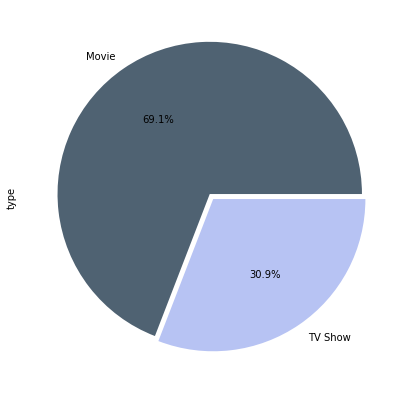

In [117]:
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
Net_df['type'].value_counts().plot.pie( autopct = '%.1f%%',explode = [0.02,0.02],colors = colors, figsize=(15,7))

In [118]:
Net_df["director"].nunique()

4048

In [119]:
Net_df["director"].value_counts()

Unknown                   2376
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
                          ... 
Charles Officer              1
John Trengove                1
Jonathan Helpert             1
Jacob Schwab                 1
Sam Dunn                     1
Name: director, Length: 4048, dtype: int64

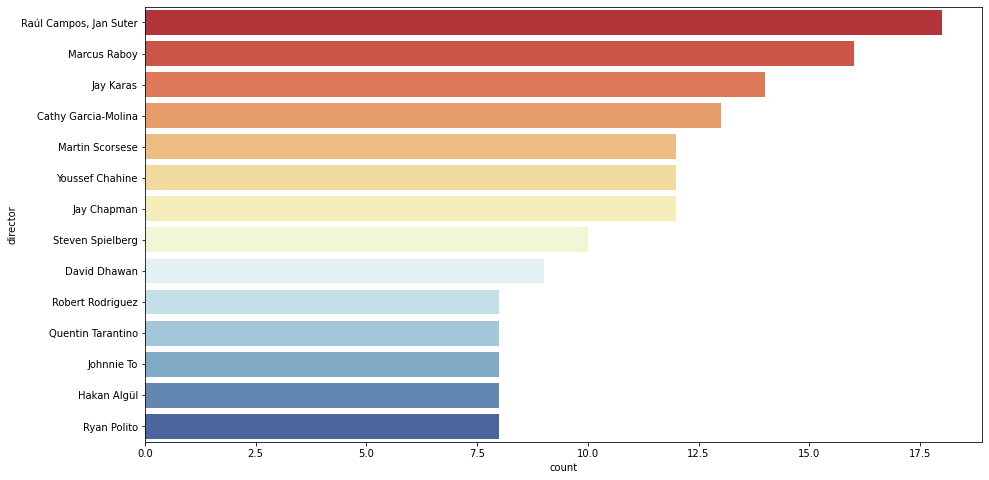

In [120]:
plt.figure(figsize=(15,8))
sns.countplot(y =Net_df['director'], data = Net_df , palette="RdYlBu", order=Net_df['director'].value_counts().index[1:15] )

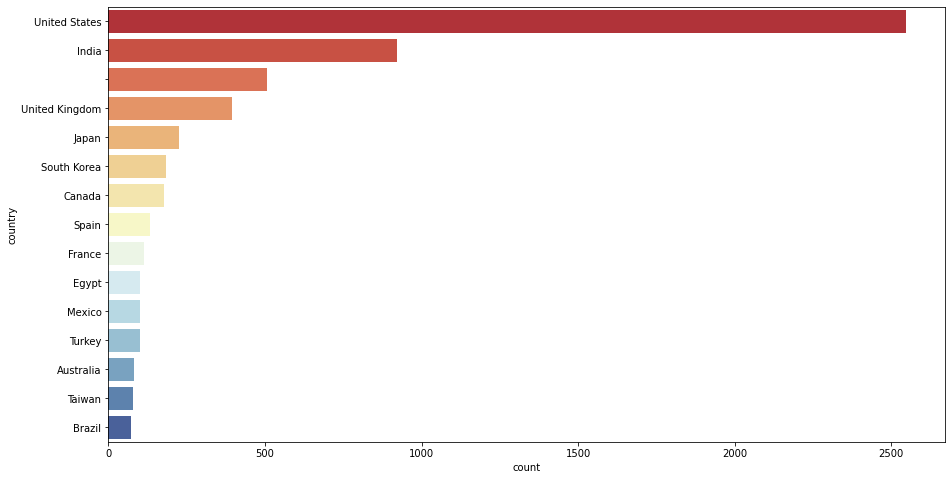

In [121]:
plt.figure(figsize=(15,8))
sns.countplot(y =Net_df['country'], data = Net_df , palette="RdYlBu", order=Net_df['country'].value_counts().index[0:15] )

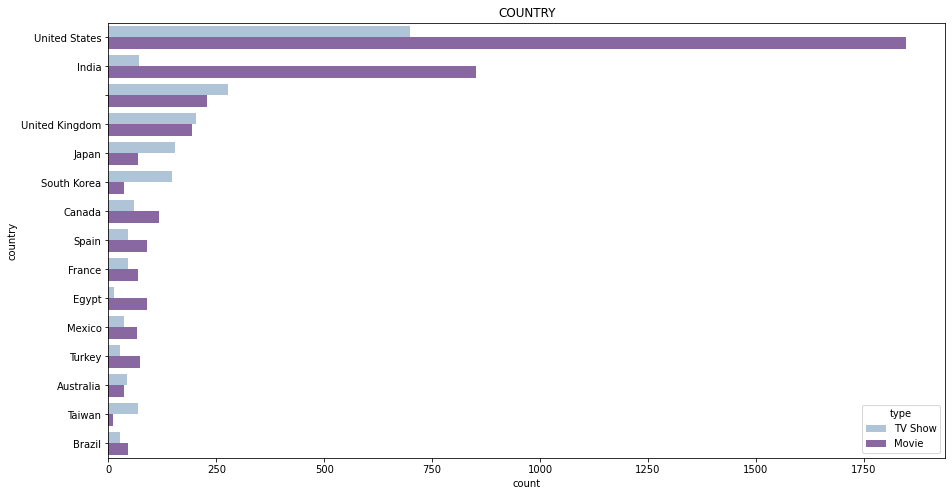

In [122]:
plt.figure(figsize=(15,8))
sns.countplot(y=Net_df['country'],palette="BuPu",order=Net_df['country'].value_counts().index[0:15],hue=Net_df['type'])
plt.title("COUNTRY")
plt.show()

In [124]:
Net_df["rating"].nunique()

14

In [127]:
Net_df["rating"].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [129]:
rename_rating = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

Net_df['rating'] = Net_df['rating'].replace(to_replace = rename_rating)
Net_df['rating'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

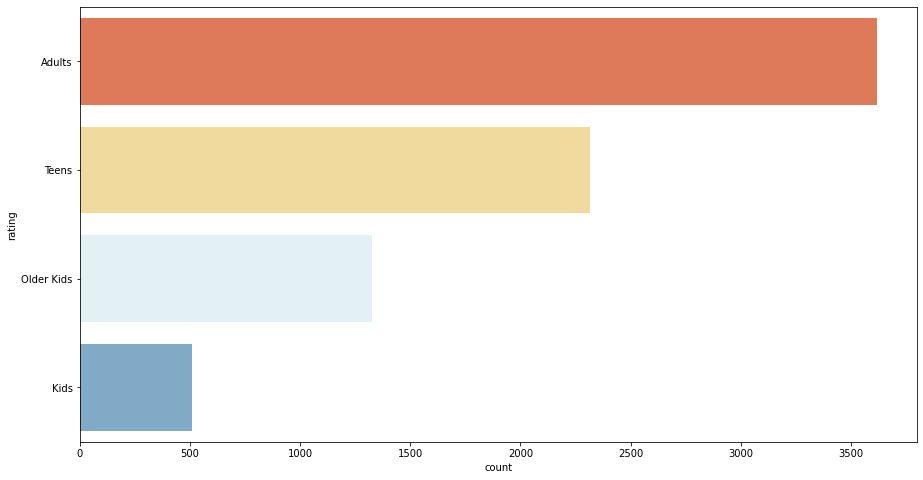

In [130]:
plt.figure(figsize=(15,8))
sns.countplot(y =Net_df['rating'], data = Net_df , palette="RdYlBu", )

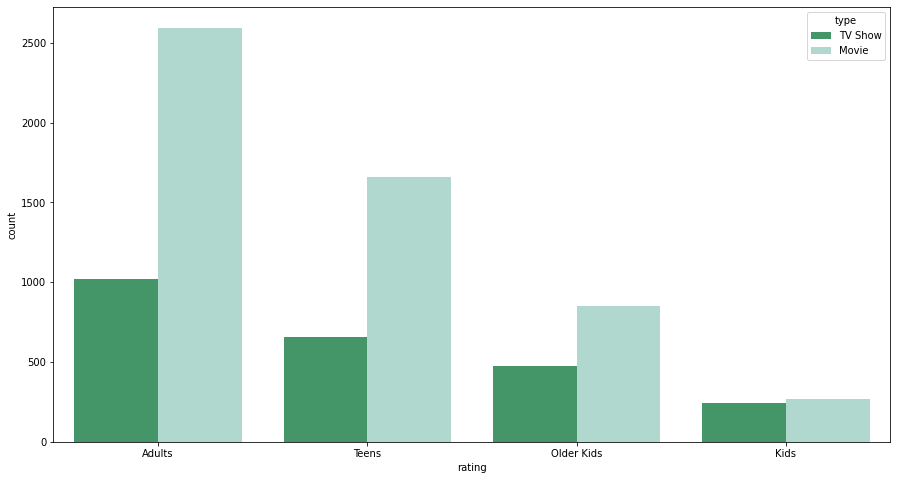

In [133]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = Net_df , x = Net_df['rating'],palette = 'BuGn_r', hue = Net_df['type'],)

In [135]:
Net_df["genres"].nunique()

491

In [136]:
Net_df["genres"].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: genres, Length: 491, dtype: int64